# 05. Model CNN - Optimized

### Importando as bibliotecas

In [1]:
import sys
import os
from pathlib import Path
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### Configurando para serem exibidas apenas mensagens de erro no Tensor Flow

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Configurando para serem exibidas apenas mensagens de erro no Tensor Flow

### Lendo o dataset

In [3]:
df = keras.datasets.mnist # Armazenando o dataset em uma variável

In [4]:
(x_train, y_train), (x_test, y_test) = df.load_data() # Armazenando os dados do df já divididos em X e Y de treino e teste

### Definindo o modelo Keras a partir de um pipeline

In [ ]:
# Etapa inicial
model = keras.models.Sequential() # Instanciando o modelo

# Etapas de pré processamento
model.add(keras.layers.InputLayer(input_shape=(28, 28, 1))) # Passando o shape dos dados para o modelo
model.add(keras.layers.Rescaling(scale=1./255)) # Fazendo o rescaling dos dados entre 0 e 255 para 0 e 1

# Etapas de CNN
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu')) # Adicionando uma camada convolucional
model.add(keras.layers.MaxPooling2D()) # Adicionando o Max Pooling visando desconsiderar o fundo da imagem
model.add(keras.layers.Dropout(0.2)) # Desligando alguns neurônios aleatóriamente para tentar reduzir o overfitting
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu')) # Adicionando uma camada convolucional
model.add(keras.layers.MaxPooling2D()) # Adicionando o Max Pooling visando desconsiderar o fundo da imagem
model.add(keras.layers.Dropout(0.2)) # Desligando alguns neurônios aleatóriamente para tentar reduzir o overfitting

# Etapas de camadas ocultas
model.add(keras.layers.Flatten()) # Realizando a redução de dimensionalidade/achatamento
model.add(keras.layers.Dense(10, activation='softmax')) # Passando a camada de sáida (10 = valores de resultados possíveis (0 a 9))

model.summary() # Exibindo o resumo do treinamento

c:\Users\mathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        32,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,506 (416.04 KB)

 Trainable params: 106,506 (416.04 KB)

 Non-trainable params: 0 (0.00 B)

### Compilando o modelo

In [6]:
optimizer = keras.optimizers.Adam(learning_rate=1E-3) # Definindo o otimizador
loss = keras.losses.SparseCategoricalCrossentropy() # Definindo a função de busca
metric = keras.metrics.SparseCategoricalAccuracy() # Definindo a métrica a ser considerada durante o treinamento

model.compile(optimizer=optimizer, loss=loss, metrics=[metric]) # Compilando o modelo

### Treinando o modelo

In [7]:
early_stop = keras.callbacks.EarlyStopping( # Configurando um callback que interrompe o treinamento do modelo caso o desempenho pare de melhorar, com base em métricas monitoradas
    patience = 5, # Definindo o patience, que é o número de epochs consecutivas em que a métrica monitorada pode não melhorar antes de interromper o treinamento
    verbose = 1, # Definindo o verbose para exibir a informação de quando o callback for acionado caso aconteça
    min_delta = 1E-4, # Definindo a menor diferença aceitável para considerar que houve melhora em uma métrica monitorada
)

history = model.fit( # Treinando o modelo e armazenando o seu resultado em uma variável
    x_train, # Passando os valores de x de treino
    y_train, # Passando os valores de y de treino
    epochs = 300, # Definindo o número máximo de epochs, ou seja, quantas vezes o modelo passará por todo o conjunto de treino durante o ajuste
    batch_size = 128, # Definindo o batch size, que é o número de amostras processadas de uma só vez antes de atualizar os pesos do modelo
    validation_split = 0.2, # Definindo a proporção dos dados de treino que será separada para validação
    callbacks = [early_stop] # Definindo o callback com a condição de parada definida anteriormente para interromper o treinamento do modelo
)

Epoch 1/300
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - loss: 0.6141 - sparse_categorical_accuracy: 0.8078 - val_loss: 0.0772 - val_sparse_categorical_accuracy: 0.9783
Epoch 2/300
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - loss: 0.0853 - sparse_categorical_accuracy: 0.9738 - val_loss: 0.0566 - val_sparse_categorical_accuracy: 0.9834
Epoch 3/300
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 84ms/step - loss: 0.0571 - sparse_categorical_accuracy: 0.9828 - val_loss: 0.0528 - val_sparse_categorical_accuracy: 0.9838
Epoch 4/300
375/375 ━━━━━━━━━━━━━━━━━━━━ 32s 86ms/step - loss: 0.0482 - sparse_categorical_accuracy: 0.9856 - val_loss: 0.0465 - val_sparse_categorical_accuracy: 0.9858
Epoch 5/300
375/375 ━━━━━━━━━━━━━━━━━━━━ 36s 97ms/step - loss: 0.0407 - sparse_categorical_accuracy: 0.9876 - val_loss: 0.0436 - val_sparse_categorical_accuracy: 0.9874
Epoch 6/300
375/375 ━━━━━━━━━━━━━━━━━━━━ 35s 93ms/step - loss: 0.0352 - sparse_categorical_accuracy: 0.9888 - val_loss: 0.0408 - val_sparse_categorical_acc

### Fazendo o evaluate do modelo

In [8]:
model.evaluate(x_test, y_test) # Fazendo o evaluate do modelo

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - loss: 0.0403 - sparse_categorical_accuracy: 0.9879


[0.0334642119705677, 0.9905999898910522]

### Verificando possíveis condições de overfitting

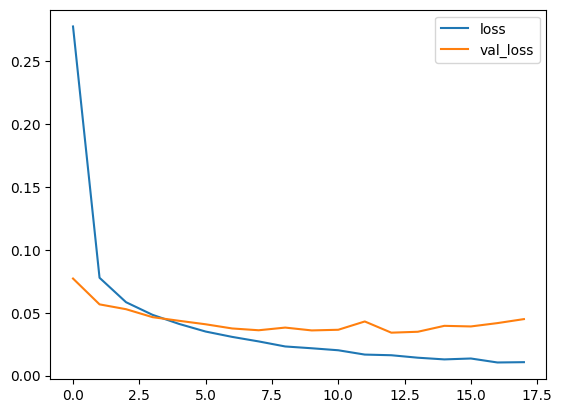

In [9]:
plt.plot(history.history['loss'], label='loss') # Plotando os valores de treino
plt.plot(history.history['val_loss'], label='val_loss') # Plotando os valores de validação
plt.legend() # Exibindo as legendas
plt.show() # Exibindo o gráfico

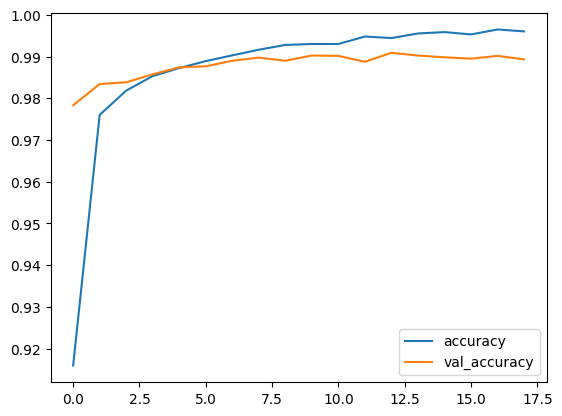

In [10]:
plt.plot(history.history['sparse_categorical_accuracy'], label='accuracy') # Plotando os valores de treino
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy') # Plotando os valores de validação
plt.legend() # Exibindo as legendas
plt.show() # Exibindo o gráfico

Nesse cenário, mesmo após o ajuste de alguns parâmetros, os indícios de overfitting ainda se mantém no modelo, devido as curvas de validação se manterem constante a partir de um determinado ponto, enquanto as curvas de treino seguem evoluindo

### Fazendo o predict do modelo com uma amostra dos dados

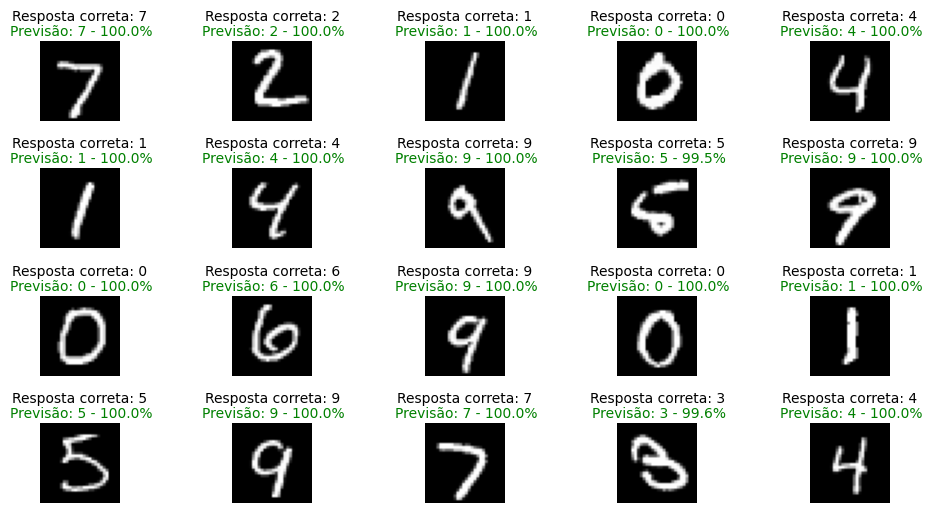

In [11]:
fig, axs = plt.subplots(figsize=(12,6), nrows=4, ncols=5) # Definindo o tamanho da figura para exibir os gráficos

for i, ax in enumerate(axs.flat): # Criando uma estrutura de repetição para percorrer cada valor de x e plotar em um gráfico
    ax.imshow(x_test[i], cmap='gray') # Plotando a imagem em um gráfico em escala de cinza
    ax.set_title(f'Resposta correta: {y_test[i]}', size=10, pad=15) # Definindo o título do gráfico
    ax.axis('off') # Desativando os títulos dos eixos
    pred = model.predict(np.expand_dims(x_test[i], axis=0), verbose=0)[0] # Armazenando a previsão do modelo em uma variável
    ax.text( # Adicionando um texto com a previsão do modelo
        14, # Definindo a posição horizontal
        -4, # Definindo a posição vertical
        f'Previsão: {pred.argmax()} - {pred.max():.1%}', # Definindo o conteúdo do texto
        color='green' if pred.argmax() == y_test[i] else 'red', # Definindo a cor do texto, variando de acordo com a previsão certa ou errada
        verticalalignment = 'center', # Definindo o alinhamento vertical
        horizontalalignment = 'center', # Definindo o alinhamento horizontal
    )

fig.subplots_adjust(hspace=0.6) # Ajustando o espaço entre cada subfigura

plt.show() # Exibindo os gráficos

### Testando o modelo em imagens criadas manualmente

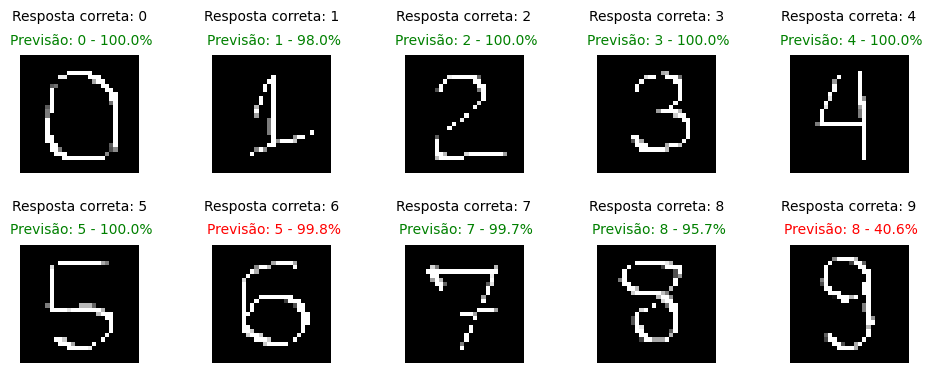

In [12]:
real_images_dir = Path('../images/real_images') # Armazenando em uma variável o caminho da pasta das imagens criadas manualmente

all_pred = {} # Criando um dicionário vazio para armazenar as previsões do modelo e poder verificar as probabilidades de cada resultado posteriormente

fig, axs = plt.subplots(figsize=(12,4), nrows=2, ncols=5) # Definindo o tamanho da figura para exibir os gráficos

for i, (img, ax) in enumerate(zip(sorted(real_images_dir.glob('*.png')), axs.flat)): # Criando uma estrutura de repetição para percorrer as imagens criadas e plotar em um gráfico

    name = img.name.split('.')[0] # Armazenando em uma variável o nome da imagem com o número correto a partir do . como separador

    img = keras.preprocessing.image.load_img(
        img, target_size=(28, 28), color_mode='grayscale'
    ) # Ajustando a escala da imagem, pois o modelo foi treinado com imagens com 28 x 28 pixels, e as que fizemos possuem 128 x 128
    img_array = keras.preprocessing.image.img_to_array(img) # Convertendo a imagem para um array NumPy
    img_array = 255 - img_array # Invertendo as cores da imagem, pois o modelo foi treinado com imagens com fundo preto, e as que fizemos são com fundo branco
    img_array = tf.expand_dims(img_array, 0) # Adicionando uma dimensão extra

    pred = model.predict(img_array, verbose=0) # Armazenando o valor previsto em uma variável
    all_pred[name] = pred # Adicionando a previsão no dicionário criado anteriormente para isso

    ax.imshow(img_array[0], cmap='gray') # Plotando a imagem em um gráfico em escala de cinza
    ax.set_title(f'Resposta correta: {name}', size=10, pad=25) # Definindo o título do gráfico
    ax.axis('off') # Desativando os títulos dos eixos
    ax.text( # Adicionando um texto com a previsão do modelo
        14, # Definindo a posição horizontal
        -4, # Definindo a posição vertical
        f'Previsão: {pred.argmax()} - {pred.max():.1%}', # Definindo o conteúdo do texto
        color='green' if str(pred.argmax()) == name else 'red', # Definindo a cor do texto, variando de acordo com a previsão certa ou errada
        verticalalignment = 'center', # Definindo o alinhamento vertical
        horizontalalignment = 'center', # Definindo o alinhamento horizontal
    )

fig.subplots_adjust(hspace=0.6) # Ajustando o espaço entre cada subfigura

plt.show() # Exibindo os gráficos


### Verificando as probabilidades de resultados para cada imagem

In [13]:
formatted_pred = { # Criando um dicionário para formatar os valores 
    key: np.array([['{:.1f}%'.format(x * 100) for x in row] for row in value]) 
    for key, value in all_pred.items()
}

for key, value in formatted_pred.items(): # Criando uma estrutura de repetição para printar os resultados de chave e valor das previsões
    print(f'{key}: {value}')

0: [['100.0%' '0.0%' '0.0%' '0.0%' '0.0%' '0.0%' '0.0%' '0.0%' '0.0%' '0.0%']]
1: [['0.0%' '98.0%' '0.3%' '0.0%' '1.6%' '0.0%' '0.0%' '0.0%' '0.0%' '0.0%']]
2: [['0.0%' '0.0%' '100.0%' '0.0%' '0.0%' '0.0%' '0.0%' '0.0%' '0.0%' '0.0%']]
3: [['0.0%' '0.0%' '0.0%' '100.0%' '0.0%' '0.0%' '0.0%' '0.0%' '0.0%' '0.0%']]
4: [['0.0%' '0.0%' '0.0%' '0.0%' '100.0%' '0.0%' '0.0%' '0.0%' '0.0%' '0.0%']]
5: [['0.0%' '0.0%' '0.0%' '0.0%' '0.0%' '100.0%' '0.0%' '0.0%' '0.0%' '0.0%']]
6: [['0.0%' '0.0%' '0.0%' '0.0%' '0.0%' '99.8%' '0.2%' '0.0%' '0.0%' '0.0%']]
7: [['0.0%' '0.0%' '0.0%' '0.3%' '0.0%' '0.0%' '0.0%' '99.7%' '0.0%' '0.0%']]
8: [['0.0%' '0.0%' '0.0%' '4.3%' '0.0%' '0.0%' '0.0%' '0.0%' '95.7%' '0.0%']]
9: [['0.0%' '0.0%' '0.0%' '31.5%' '0.0%' '0.7%' '0.0%' '0.0%' '40.6%'
  '27.1%']]
